In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bimabk","key":"bd262c9ef3011913dd02e720173298bc"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d idhamozi/indonesian-sign-language-bisindo

 99% 883M/890M [00:06<00:00, 162MB/s]
100% 890M/890M [00:07<00:00, 133MB/s]


In [5]:
# unzip
!mkdir bisindo
!unzip -qq indonesian-sign-language-bisindo.zip -d bisindo
!ls bisindo

'Dataset BISINDO'


In [6]:
!ls bisindo/dataset-bisindo/
!ls bisindo/dataset-bisindo/datatrain/
!ls bisindo/dataset-bisindo/datatest/

datatest  datatrain
A  C  E  G  I  K  M  NOTHING  P  R  T  V  X  Z
B  D  F  H  J  L  N  O	      Q  S  U  W  Y
A  C  E  G  I  K  M  NOTHING  P  R  T  V  X  Z
B  D  F  H  J  L  N  O	      Q  S  U  W  Y


In [7]:
bisindo = os.path.join('bisindo/dataset-bisindo/datatrain/')

print(os.listdir(bisindo))

['S', 'F', 'Z', 'B', 'X', 'G', 'L', 'O', 'V', 'K', 'I', 'N', 'NOTHING', 'W', 'R', 'U', 'Y', 'D', 'H', 'T', 'C', 'J', 'A', 'E', 'M', 'P', 'Q']


In [8]:
list_bisindo = os.listdir(bisindo)
print(list_bisindo)

['S', 'F', 'Z', 'B', 'X', 'G', 'L', 'O', 'V', 'K', 'I', 'N', 'NOTHING', 'W', 'R', 'U', 'Y', 'D', 'H', 'T', 'C', 'J', 'A', 'E', 'M', 'P', 'Q']


In [9]:
from PIL import Image
total = 0

for x in list_bisindo:
  dir = os.path.join(bisindo, x)
  y = len(os.listdir(dir))
  print(x+':', y)
  total = total + y
  
  img_name = os.listdir(dir)
  for z in range(4):
    img_path = os.path.join(dir, img_name[z])
    img = Image.open(img_path)
    print('-',img.size)
  print('---------------')

print('\nTotal :', total)

S: 64
- (2592, 1728)
- (2592, 1728)
- (2592, 1728)
- (2592, 1728)
---------------
F: 64
- (2592, 1728)
- (2592, 1728)
- (2592, 1728)
- (2592, 1728)
---------------
Z: 64
- (2592, 1728)
- (2592, 1728)
- (2592, 1728)
- (2592, 1728)
---------------
B: 64
- (2592, 1728)
- (2592, 1728)
- (2592, 1728)
- (2592, 1728)
---------------
X: 64
- (2592, 1728)
- (2592, 1728)
- (2592, 1728)
- (2592, 1728)
---------------
G: 64
- (2592, 1728)
- (2592, 1728)
- (2592, 1728)
- (2592, 1728)
---------------
L: 64
- (2592, 1728)
- (2592, 1728)
- (2592, 1728)
- (2592, 1727)
---------------
O: 64
- (2592, 1728)
- (2592, 1728)
- (2592, 1728)
- (2592, 1728)
---------------
V: 64
- (2592, 1728)
- (2592, 1728)
- (2592, 1728)
- (2592, 1728)
---------------
K: 64
- (2592, 1728)
- (2592, 1728)
- (2592, 1728)
- (2592, 1728)
---------------
I: 64
- (2592, 1728)
- (2592, 1728)
- (2592, 1728)
- (2592, 1728)
---------------
N: 64
- (2592, 1728)
- (2592, 1728)
- (2592, 1728)
- (2592, 1728)
---------------
NOTHING: 64
- (2

<function matplotlib.pyplot.show>

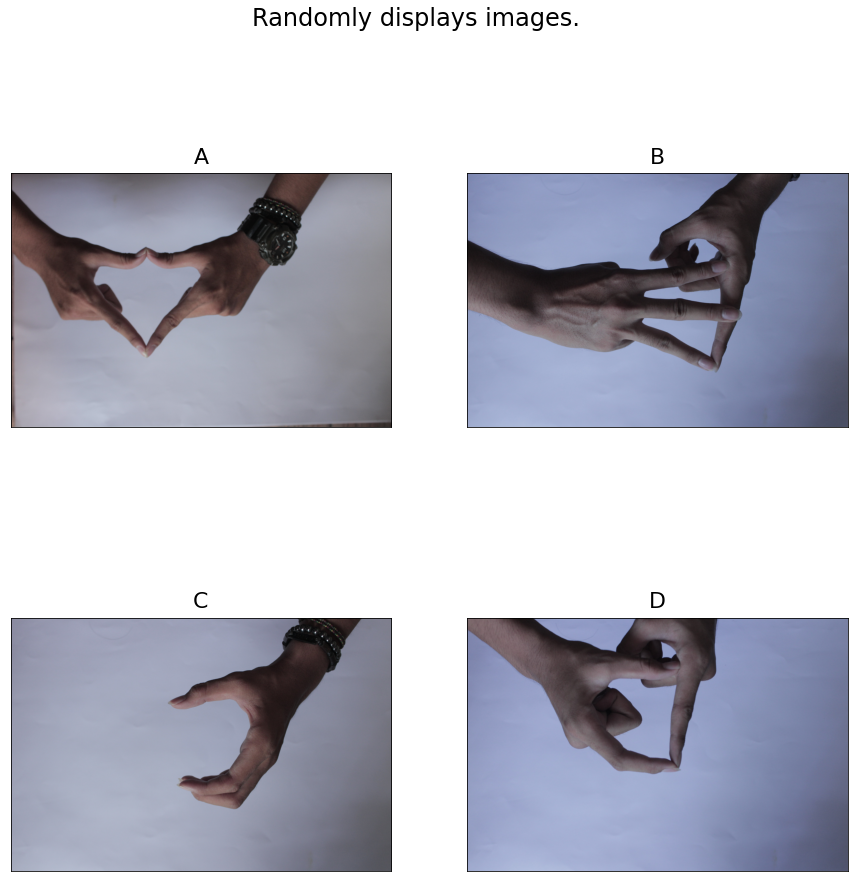

In [10]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle("Randomly displays images.", fontsize=24)
bisindo_sorted = sorted(list_bisindo)
bisindo_id = 0
for i in range(2):
  for j in range(2):
    try:
      bisindo_selected = bisindo_sorted[bisindo_id] 
      bisindo_id += 1
    except:
      break
    if bisindo_selected == '.TEMP':
        continue
    bisindo_selected_images = os.listdir(os.path.join(bisindo, bisindo_selected))
    bisindo_selected_random = np.random.choice(bisindo_selected_images)
    img = plt.imread(os.path.join(bisindo, bisindo_selected, bisindo_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(bisindo_selected, pad=10, fontsize=22)
    
plt.setp(ax, xticks=[],yticks=[])
plt.show

In [11]:
#Split into Training and Validation
train_dir = "bisindo/dataset-bisindo/datatrain/"

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  

train_dataset = train_datagen.flow_from_directory(
                batch_size=32,
                directory=train_dir,
                target_size=(224, 224), 
                subset="training",
                color_mode="rgb",
                shuffle=True,
                class_mode='categorical')

validation_dataset = train_datagen.flow_from_directory(
                batch_size=32,
                directory=train_dir,
                target_size=(224, 224), 
                subset="validation",
                color_mode="rgb",
                shuffle=True,
                class_mode='categorical')

Found 1403 images belonging to 27 classes.
Found 324 images belonging to 27 classes.


In [12]:
print(validation_dataset.class_indices)
print(train_dataset.class_indices)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'NOTHING': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'NOTHING': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}


In [13]:
#Use Transfer Learning with MobileNet
base_model = MobileNetV2(
    weights="imagenet", 
    input_shape=(200, 200, 3),
    include_top=False 
) 
base_model.trainable = False

inputs = Input(shape=(200, 200, 3))

x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation="relu")(x)
outputs = tf.keras.layers.Dense(27, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)
model.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dense_1 (Dense)             (None, 27)                3483      
                                                                

In [14]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95 and logs.get('val_accuracy')>0.95):
      print("\nAccuracy above 95%, finish training!")
      self.model.stop_training = True

callbacks = myCallback()

int_lr = 1e-4
num_epochs = 5
 
optimizer = tf.optimizers.Adam(lr=int_lr)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_dataset,
              epochs=num_epochs,
              validation_data=validation_dataset,
              callbacks = [callbacks])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
44/44 [==============================] - 149s 3s/step - loss: 2.9100 - accuracy: 0.2502 - val_loss: 2.4590 - val_accuracy: 0.4599
Epoch 2/5
44/44 [==============================] - 137s 3s/step - loss: 1.8405 - accuracy: 0.7270 - val_loss: 1.7333 - val_accuracy: 0.7377
Epoch 3/5
44/44 [==============================] - 139s 3s/step - loss: 1.0987 - accuracy: 0.9045 - val_loss: 1.2332 - val_accuracy: 0.8735
Epoch 4/5
44/44 [==============================] - 138s 3s/step - loss: 0.6445 - accuracy: 0.9672 - val_loss: 0.9334 - val_accuracy: 0.8920
Epoch 5/5
44/44 [==============================] - 138s 3s/step - loss: 0.3971 - accuracy: 0.9879 - val_loss: 0.7445 - val_accuracy: 0.8951


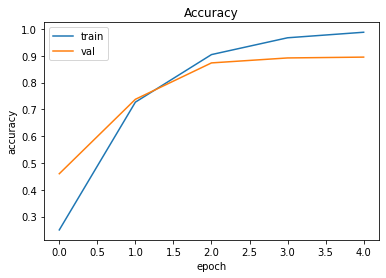

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

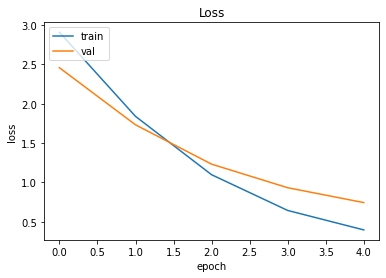

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
#Model Evaluation
score = model.evaluate(validation_dataset, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.7444841265678406 / Test accuracy: 0.895061731338501


In [20]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('dataset.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpvgedrdvx/assets


INFO:tensorflow:Assets written to: /tmp/tmpvgedrdvx/assets
